Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function 

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [3]:
import pandas as pd
data = pd.read_csv("pima-indians-diabetes.csv",delimiter=",")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Feature Engineering
(1)Feature Cleaning
(2)Feature Transformation
(3)Feature Selection

In [4]:
print(data.columns.tolist()) 

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']


In [5]:
import numpy as np
# data['Pregnancies'].replace((0),(np.nan),inplace=True)  不該轉換成 NaN，0 是可能合理的值，有可能沒懷孕過
data['Glucose'].replace((0),(np.nan),inplace=True)
data['BloodPressure'].replace((0),(np.nan),inplace=True)
data['SkinThickness'].replace((0),(np.nan),inplace=True)
data['Insulin'].replace((0),(np.nan),inplace=True)
data['BMI'].replace((0),(np.nan),inplace=True)
# data['DiabetesPedigreeFunction'].replace((0),(np.nan),inplace=True) 一個人家族中有可能完全沒有人有糖尿病
data['Age'].replace((0),(np.nan),inplace=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


(1)Feature Cleaning
Missing Value

In [6]:
data.isna().sum() #check missing values amount

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

根據 Class = 0 和 Class = 1 計算各欄位的平均數
並處理missing value

In [7]:

cols_to_fill = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_fill:
    data[col] = data[col].fillna(data.groupby('Class')[col].transform('mean').round())


In [8]:
data.isna().sum() #再次確認是否有遺漏miss value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,207.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.0,26.6,0.351,31,0
2,8,183.0,64.0,33.0,207.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
# 取出最後 100 筆作為預測資料
inference_data = data.tail(100)

# 匯出成 CSV 檔案
inference_data.to_csv('pima-indians-diabetes_tableau.csv', index=False)

(2)Feature Transformation

In [11]:
Q1 = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']].quantile(0.25)
Q3 = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']].quantile(0.75)
IQR = Q3 - Q1

# 篩選出異常值
outliers = ((data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']] < (Q1 - 1.5 * IQR)) |
            (data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']] > (Q3 + 1.5 * IQR)))

print(outliers.sum())  # 每個欄位異常值數量


Glucose                      0
BloodPressure               14
SkinThickness               53
Insulin                     26
DiabetesPedigreeFunction    29
dtype: int64


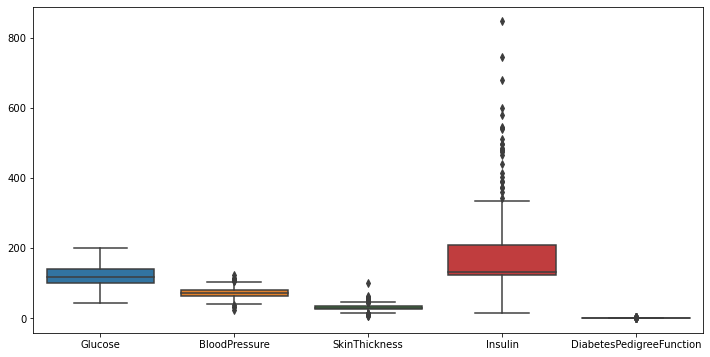

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']])
plt.show()


In [13]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# 用 MinMaxScaler 處理沒有離群值的欄位
data[['Glucose']] = minmax_scaler.fit_transform(data[['Glucose']])

# 用 RobustScaler 處理有離群值的欄位
cols_with_outliers = ['BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']
data[cols_with_outliers] = robust_scaler.fit_transform(data[cols_with_outliers])

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,0.670968,0.000,0.875,0.900585,33.6,0.665359,50,1
1,1,0.264516,-0.375,0.125,0.000000,26.6,-0.056209,31,0
2,8,0.896774,-0.500,0.625,0.900585,23.3,0.783007,32,1
3,1,0.290323,-0.375,-0.625,-0.421053,28.1,-0.537255,21,0
4,0,0.600000,-2.000,0.875,0.444444,43.1,5.007843,33,1


(2)Feature Transformation
Categorical Encoding

In [14]:
bins = [-np.inf, 18.5, 25, 30, np.inf]
labels = [0, 1, 2, 3]
# Underweight
# Healthy Weight
# Overweight
# Obesity
data['BMI'] = pd.cut(data['BMI'], bins=bins, labels=labels)

In [15]:
data['BMI'].unique() #查看BMI資料有哪些

[3, 2, 1, 0]
Categories (4, int64): [0 < 1 < 2 < 3]

In [16]:
import pandas as pd

# 定義年齡區間邊界
bins = [10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8]

# 套用分箱
data['Age'] = pd.cut(data['Age'], bins=bins, labels=labels)


In [17]:
data['Age'].unique() #查看Age資料有哪些	

[4, 3, 2, 5, 6, 7, 8]
Categories (7, int64): [2 < 3 < 4 < 5 < 6 < 7 < 8]

(3)Feature Selection
Feature Importance Filter

In [18]:
data_corr = data.corr()
data_corr['Class'].sort_values(ascending = False)

Class                       1.000000
Glucose                     0.495901
Insulin                     0.411877
SkinThickness               0.311242
Pregnancies                 0.221898
BloodPressure               0.174175
DiabetesPedigreeFunction    0.173844
Name: Class, dtype: float64

In [19]:
# 分出訓練 + 測試資料（前 668 筆）
train_test_data = data.head(len(data) - 100)
# 分出訓練 + 測試資料（後 100 筆）
inference_data = data.tail(100)

# 定義特徵 X 和目標變數 Y
X = train_test_data.drop(['Class'], axis=1)
Y = train_test_data['Class']


# 建立隨機森林模型並訓練
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, Y)

# 計算特徵的重要性
feature_importance = model.feature_importances_

# 顯示每個特徵的重要性
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# 根據重要性排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                    Feature  Importance
4                   Insulin    0.372540
1                   Glucose    0.172805
3             SkinThickness    0.153023
6  DiabetesPedigreeFunction    0.089585
2             BloodPressure    0.066835
0               Pregnancies    0.062168
7                       Age    0.048802
5                       BMI    0.034242


In [20]:

train_test_data.to_csv('pima-indians-diabetes_traintest.csv', index=False, encoding='utf-8-sig')
inference_data.to_csv('pima-indians-diabetes_predict.csv', index=False, encoding='utf-8-sig')

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [23]:
# 使用測試集進行預測
Y_pred_log_reg = log_reg_model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 計算準確率
accuracy_log_reg = accuracy_score(Y_test, Y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

# 混淆矩陣
conf_matrix_log_reg = confusion_matrix(Y_test, Y_pred_log_reg)
print("Confusion Matrix:")
print(conf_matrix_log_reg)

# 顯示分類報告（精確度、召回率、F1 分數等）
class_report_log_reg = classification_report(Y_test, Y_pred_log_reg)
print("Classification Report:")
print(class_report_log_reg)


Logistic Regression Accuracy: 0.8308
Confusion Matrix:
[[119  17]
 [ 17  48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       136
           1       0.74      0.74      0.74        65

    accuracy                           0.83       201
   macro avg       0.81      0.81      0.81       201
weighted avg       0.83      0.83      0.83       201



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# 分割資料
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 建立模型
xgb_model = XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    enable_categorical=True,
    random_state=42
)

# 訓練模型
xgb_model.fit(X_train, Y_train)

# 預測
xgb_pred = xgb_model.predict(X_test)

# 評估結果
print("XGBoost Accuracy:", accuracy_score(Y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, xgb_pred))
print("Classification Report:\n", classification_report(Y_test, xgb_pred))


XGBoost Accuracy: 0.8756218905472637
Confusion Matrix:
 [[126  10]
 [ 15  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       136
           1       0.83      0.77      0.80        65

    accuracy                           0.88       201
   macro avg       0.86      0.85      0.85       201
weighted avg       0.87      0.88      0.87       201



c:\Users\z3020\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:09:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import joblib

joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [ ]:
import joblib
import pandas as pd

loaded_model = joblib.load('xgb_model.pkl')

predict_data = pd.read_csv('pima-indians-diabetes_predict.csv')

predict_data = predict_data.drop(columns=['Class'], errors='ignore')

predictions = loaded_model.predict(predict_data)

# 載入 Tableau 原始資料
tableau_data = pd.read_csv('pima-indians-diabetes_tableau.csv')
tableau_data['Predicted'] = predictions
tableau_data.to_csv('pima-indians-diabetes_tableau_with_predictions.csv', index=False, encoding='utf-8-sig')


In [ ]:

# 讀取原始 CSV
df = pd.read_csv("pima-indians-diabetes_tableau_with_predictions.csv")

# 建立欄位名稱對應表（英文 → 中文）
column_mapping = {
    "Pregnancies": "懷孕次數",
    "Glucose": "血糖值",
    "BloodPressure": "血壓",
    "SkinThickness": "皮膚厚度",
    "Insulin": "胰島素",
    "BMI": "身體質量指數",
    "DiabetesPedigreeFunction": "糖尿病家族指數",
    "Age": "年齡",
    "Class": "真實標籤",
    "Predicted": "預測結果"
}

df.rename(columns=column_mapping, inplace=True)

df.to_csv("pima-indians-diabetes_tableau_with_predictions_ch.csv", index=False, encoding='utf-8-sig') 
